<a href="https://colab.research.google.com/github/solankinitin1210/Capstone-Project-Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

## **Import libraries and dataset**

In [ ]:
# Importing the libraries for process data
import pandas as pd
import numpy as np
from numpy import math

# Import libraries for ploting data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Mount driver
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import CSV file from drive 
df=pd.read_excel('/content/drive/MyDrive/Almabetter/Capstone Project 4/Online Retail.xlsx')

In [ ]:
# Let's check how our dataset look like
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Let's check the null values for all the columns
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.isnull().sum() * 100 / len(df)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [ ]:
# Let's check the statistics of columns
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#Find Unique values for Invoice,Customer,Product,Country
df[['InvoiceNo','CustomerID','StockCode','Country']].nunique()

InvoiceNo     22190
CustomerID     4372
StockCode      3684
Country          37
dtype: int64

In [ ]:
df[df['CustomerID'].isna()]['InvoiceNo'].nunique()

0

In [ ]:
df[df["InvoiceNo"].str.startswith('C',na=False)]['InvoiceNo'].nunique()

3836

**Observation**

## **Clean Dataset and Add Required Columns**

In [ ]:
# remove duplicate records
display(df.shape)
df = df.drop_duplicates()
display(df.shape)

(541909, 8)

(536641, 8)

In [ ]:
# Add cancellation column
df["cancellation"] = np.where(df["InvoiceNo"].str.startswith('C')==True,1,0)

In [ ]:
# find the number of cancel invoice
df[df['cancellation']==1]['InvoiceNo'].nunique()

3654

In [ ]:
# Add total price column
df["Total_sales"] = df["UnitPrice"]*df["Quantity"]

In [ ]:
# Add Month,year and hour column for EDA
df['Invoice_month']=df['InvoiceDate'].dt.month
df['Invoice_year']=df['InvoiceDate'].dt.year
df['Invoice_hour']=df['InvoiceDate'].dt.hour
df['week_day']=df['InvoiceDate'].dt.weekday

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellation,Total_sales,Invoice_month,Invoice_year,Invoice_hour,week_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30,12,2010,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,12,2010,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00,12,2010,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,12,2010,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,12,2010,8,2


## **Deal with null values**

In [ ]:
# Check how many customer unique customer ID is there for each invoice 
df.groupby('InvoiceNo')['CustomerID'].nunique().reset_index().sort_values(by=['CustomerID'],ascending=False)

,InvoiceNo,CustomerID
0,536365,1
16915,571200,1
16924,571215,1
16923,571214,1
16922,571213,1
...,...,...
6097,549179,0
6098,549180,0
6099,549181,0
19280,575947,0


In [ ]:
df.dropna(subset=['CustomerID'],inplace=True)

In [ ]:
df.shape

(406829, 8)

In [ ]:
df['Invoice_year'].unique()

array([2010, 2011])

In [ ]:
df[['Invoice_year','Invoice_month']].groupby('Invoice_year').agg({'Invoice_month': 'unique'}).reset_index()

,Invoice_year,Invoice_month
0,2010,[December]
1,2011,"[January, February, March, April, May, June, J..."


In [ ]:
invoice_dataset=df.groupby(['InvoiceNo','CustomerID','Country','Invoice_month','Invoice_hour','week_day','cancellation']).agg({'Total_sales': 'sum','Quantity': 'sum'}).reset_index()
invoice_dataset

,InvoiceNo,CustomerID,Country,Invoice_month,Invoice_hour,week_day,cancellation,Total_sales,Quantity
0,536365,17850.0,United Kingdom,12,8,2,0,139.12,40
1,536366,17850.0,United Kingdom,12,8,2,0,22.20,12
2,536367,13047.0,United Kingdom,12,8,2,0,278.73,83
3,536368,13047.0,United Kingdom,12,8,2,0,70.05,15
4,536369,13047.0,United Kingdom,12,8,2,0,17.85,3
...,...,...,...,...,...,...,...,...,...
22186,C581484,16446.0,United Kingdom,12,9,4,1,-168469.60,-80995
22187,C581490,14397.0,United Kingdom,12,9,4,1,-32.53,-23
22188,C581499,15498.0,United Kingdom,12,10,4,1,-224.69,-1
22189,C581568,15311.0,United Kingdom,12,11,4,1,-54.75,-5


In [ ]:
Top10_Country_saleswise=invoice_dataset.groupby('Country')['Total_sales'].sum().reset_index().sort_values('Total_sales',ascending=False).head(10)
Top10_Country_orderwise=invoice_dataset.groupby('Country')['InvoiceNo'].count().reset_index().sort_values('InvoiceNo',ascending=False).head(10)

df1_style = Top10_Country_saleswise.style.set_table_attributes("style='display:inline; margin-right:30px;'").set_caption("Top10_Country_saleswise")
df2_style = Top10_Country_orderwise.style.set_table_attributes("style='display:inline'").set_caption("Top10_Country_orderwise")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)

,Country,Total_sales
35,United Kingdom,6767873.394000
23,Netherlands,284661.540000
10,EIRE,250285.220000
14,Germany,221698.210000
13,France,196712.840000
0,Australia,137077.270000
32,Switzerland,55739.400000
30,Spain,54774.580000
3,Belgium,40910.960000
31,Sweden,36595.910000


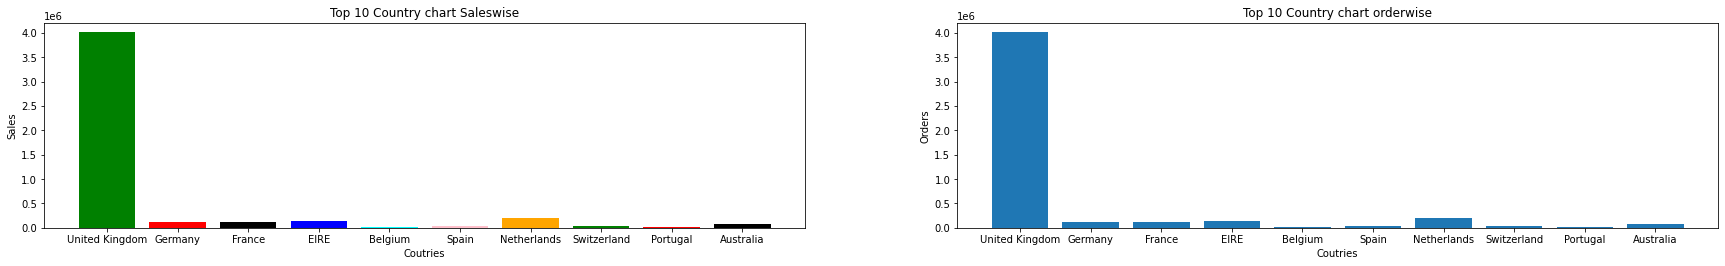

In [ ]:
plt.figure(figsize = (30,40))

plt.subplot(9,2,1) # row 1, col 2 index 1
plt.bar(Top10_Country_saleswise.Country, Top10_Country_saleswise.Quantity,color=['green', 'red', 'black', 'blue', 'cyan','pink','orange'])
plt.title("Top 10 Country chart Saleswise")
plt.xlabel('Coutries')
plt.ylabel('Sales')
 
plt.subplot(9,2,2) # index 2
plt.bar(Top10_Country_orderwise.Country, Top10_Country_orderwise.Quantity)
plt.title("Top 10 Country chart orderwise")
plt.xlabel('Coutries')
plt.ylabel('Orders')

plt.show()

In [ ]:
hour_wise_order_analysis=invoice_dataset.groupby('Invoice_hour')['InvoiceNo'].count().reset_index().sort_values('Invoice_hour')
month_wise_order_analysis=invoice_dataset.groupby('Invoice_month')['InvoiceNo'].count().reset_index().sort_values('Invoice_month')

df1_style = hour_wise_order_analysis.style.set_table_attributes("style='display:inline; margin-right:100px;'").set_caption("Top10_Country_saleswise")
df2_style = month_wise_order_analysis.style.set_table_attributes("style='display:inline;'").set_caption("Top10_Country_orderwise")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)

,Invoice_hour,InvoiceNo
0,6,22
1,7,31
2,8,608
3,9,1622
4,10,2613
5,11,2770
6,12,3597
7,13,3043
8,14,2645
9,15,2405


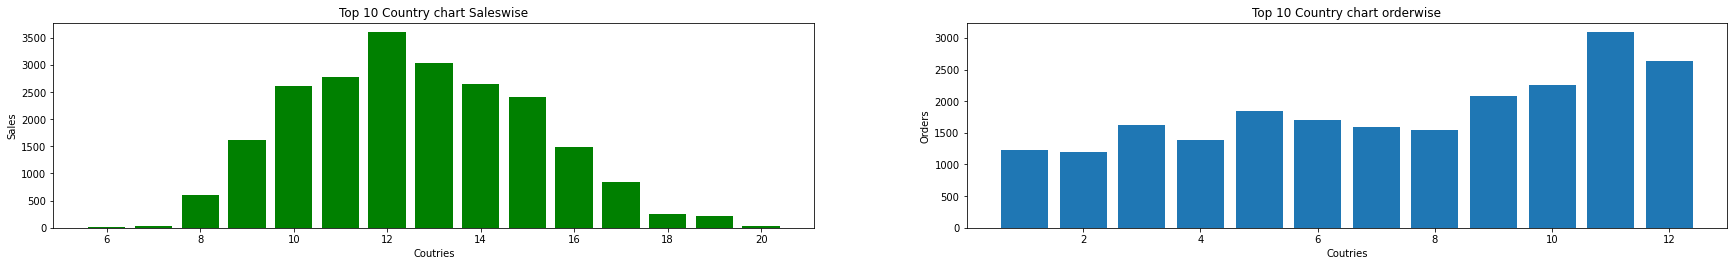

In [ ]:
plt.figure(figsize = (30,40))

plt.subplot(9,2,1) # row 1, col 2 index 1
#plt.pie(hour_wise_order_analysis['InvoiceNo'],labels=hour_wise_order_analysis['Invoice_hour'])
plt.bar(hour_wise_order_analysis.Invoice_hour, hour_wise_order_analysis.InvoiceNo,color=['green'])
plt.title("Top 10 Country chart Saleswise")
plt.xlabel('Coutries')
plt.ylabel('Sales')
 
plt.subplot(9,2,2) # index 2
plt.bar(month_wise_order_analysis.Invoice_month, month_wise_order_analysis.InvoiceNo)
plt.title("Top 10 Country chart orderwise")
plt.xlabel('Coutries')
plt.ylabel('Orders')

plt.show()

In [ ]:
invoice_dataset.groupby(['Invoice_month','week_day'])['InvoiceNo'].count().unstack()

week_day,0,1,2,3,4,6
Invoice_month,,,,,,
1,218,232,221,229,201,135
2,190,234,211,235,233,99
3,277,260,321,384,221,156
4,224,275,268,320,196,102
5,233,417,304,382,308,205
6,279,272,327,413,207,209
7,232,273,245,361,270,212
8,212,266,363,341,213,149
9,323,305,329,511,374,236


In [ ]:
invoice_dataset.groupby('week_day')['InvoiceNo'].count().reset_index().sort_values('InvoiceNo',ascending=False)

,week_day,InvoiceNo
3,3,4979
2,2,4110
1,1,3892
0,0,3512
4,4,3356
5,6,2342
